## Importing basic packages from python library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
dataset.isnull().sum() #No Null Values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
dataset.shape

(19237, 18)

#### Checking duplicate values

In [6]:
dataset.duplicated().sum()

313

In [7]:
dataset = dataset.drop_duplicates()

In [8]:
dataset.shape

(18924, 18)

#### There were 313 duplicate values and it has been removed

### Analysing the independent variables

In [9]:
dataset['ID']

0        45654403
1        44731507
2        45774419
3        45769185
4        45809263
           ...   
19232    45798355
19233    45778856
19234    45804997
19235    45793526
19236    45813273
Name: ID, Length: 18924, dtype: int64

In [10]:
dataset = dataset.drop(columns='ID',axis=1) #Dropping the ID column as it is less important

In [11]:
dataset.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
dataset['Price'] 

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 18924, dtype: int64

In [13]:
dataset['Price'].describe()

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

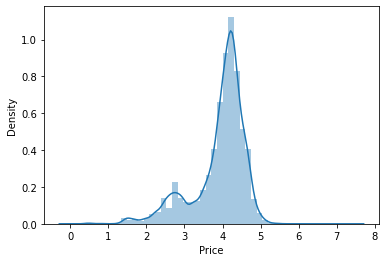

In [14]:
sns.distplot(np.log10(dataset["Price"]))

#### Dependent variable Price has a right skewness

In [15]:
dataset['Levy'] 

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: object

In [16]:
dataset['Levy'].value_counts()
#we have 5819 rows where there is no values specified for the Levy. We assume it as zero and then replace the '-' with zero. 

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [17]:
dataset['Levy'] = dataset['Levy'].replace('-',0) 

In [18]:
dataset['Levy'] = dataset['Levy'].astype(int)

In [19]:
dataset['Levy'].describe()

count    18924.000000
mean       632.886493
std        568.273736
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64

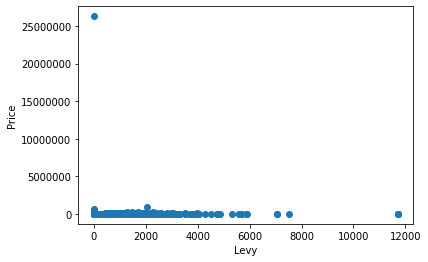

In [20]:
plt.scatter(x='Levy',y='Price',data = dataset)
plt.xlabel('Levy')
plt.ylabel('Price')
plt.ticklabel_format(style='plain')
plt.show()

## Observation from the Levy column
#### 1) we can observe that the levy column has majority integer values and also  hyphen('-') as a value. 
#### 2) we impute those values which has hyphen with zero  and convert the column into float datatype
#### 3) Maximum Levy is between 0 and 4000

In [21]:
dataset['Manufacturer']

0                LEXUS
1            CHEVROLET
2                HONDA
3                 FORD
4                HONDA
             ...      
19232    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: Manufacturer, Length: 18924, dtype: object

In [22]:
dataset['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

[Text(0.5, 0, 'Manufacturer'), Text(0, 0.5, 'Frequency of Manufacturer')]

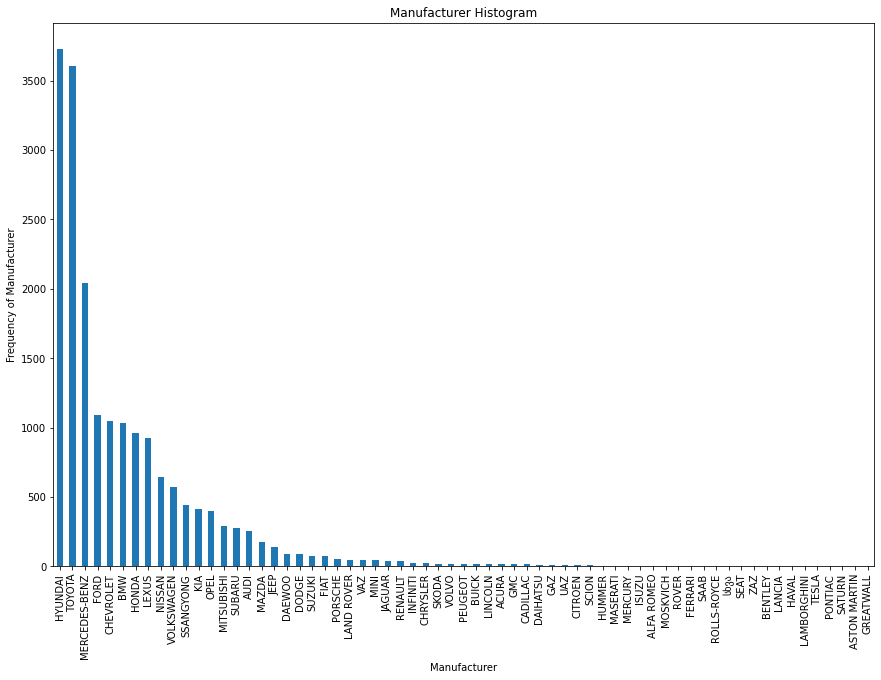

In [23]:
plt.figure(figsize=(50,10))
plt.subplot(1,3,1)
plt1 = dataset.Manufacturer.value_counts().plot(kind ='bar')
plt.title('Manufacturer Histogram')
plt1.set(xlabel = 'Manufacturer', ylabel='Frequency of Manufacturer')

In [24]:
dataset['Model']

0         RX 450
1        Equinox
2            FIT
3         Escape
4            FIT
          ...   
19232    CLK 200
19233     Sonata
19234     Tucson
19235    Captiva
19236     Sonata
Name: Model, Length: 18924, dtype: object

In [25]:
dataset['Model'].describe()

count     18924
unique     1590
top       Prius
freq       1069
Name: Model, dtype: object

### Observations: 
We can see that 1122 Unique models are there. So it will be better if we merge the Model feature with the respective manufacturer for better accuracy

In [26]:
dataset['Car model'] = dataset['Manufacturer']+' '+ dataset['Model']

In [27]:
dataset = dataset.drop(['Manufacturer','Model'],axis = 1)

In [28]:
dataset.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car model
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox
2,8467,0,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,HONDA FIT


In [29]:
dataset['Prod. year']

0        2010
1        2011
2        2006
3        2011
4        2014
         ... 
19232    1999
19233    2011
19234    2010
19235    2007
19236    2012
Name: Prod. year, Length: 18924, dtype: int64

In [30]:
dataset['Prod. year'].describe()

count    18924.000000
mean      2010.914236
std          5.665749
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64

<function matplotlib.pyplot.xlim(*args, **kwargs)>

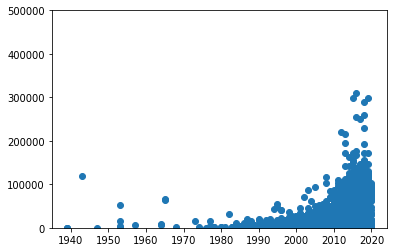

In [31]:
plt.scatter(data = dataset,x='Prod. year',y='Price')
plt.ticklabel_format(style='plain') 
plt.ylim(0,500000)
plt.xlim

## Observation: 
Gradual Increase in the price as production year increases

In [32]:
dataset['Category']

0             Jeep
1             Jeep
2        Hatchback
3             Jeep
4        Hatchback
           ...    
19232        Coupe
19233        Sedan
19234         Jeep
19235         Jeep
19236        Sedan
Name: Category, Length: 18924, dtype: object

In [33]:
dataset['Category'].describe()

count     18924
unique       11
top       Sedan
freq       8600
Name: Category, dtype: object

[Text(0, 0, '5378'),
 Text(0, 0, '2799'),
 Text(0, 0, '8600'),
 Text(0, 0, '299'),
 Text(0, 0, '229'),
 Text(0, 0, '361'),
 Text(0, 0, '528'),
 Text(0, 0, '633'),
 Text(0, 0, '35'),
 Text(0, 0, '11'),
 Text(0, 0, '51')]

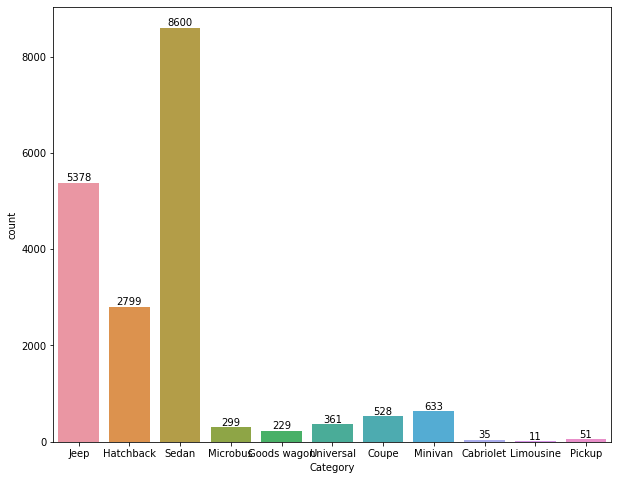

In [34]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Category',data=dataset)
ax.bar_label(ax.containers[0])

## Observation: 
### Sedan category is the highest in number(7127) followed by Jeep(3884) and Hatchback(2595)

In [35]:
dataset['Leather interior']

0        Yes
1         No
2         No
3        Yes
4        Yes
        ... 
19232    Yes
19233    Yes
19234    Yes
19235    Yes
19236    Yes
Name: Leather interior, Length: 18924, dtype: object

In [36]:
dataset['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

[Text(0, 0, '13731'), Text(0, 0, '5193')]

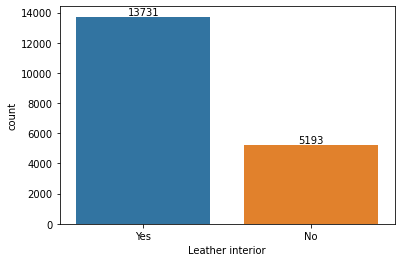

In [37]:
ax = sns.countplot(x='Leather interior',data=dataset)
ax.bar_label(ax.containers[0])

#### More than twice the amount of cars(11046) has leather interior compared to the ones which dont(4189)

In [38]:
dataset['Fuel type']

0        Hybrid
1        Petrol
2        Petrol
3        Hybrid
4        Petrol
          ...  
19232       CNG
19233    Petrol
19234    Diesel
19235    Diesel
19236    Hybrid
Name: Fuel type, Length: 18924, dtype: object

In [39]:
dataset['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

[Text(0, 0, '3539'),
 Text(0, 0, '9944'),
 Text(0, 0, '4001'),
 Text(0, 0, '469'),
 Text(0, 0, '85'),
 Text(0, 0, '885'),
 Text(0, 0, '1')]

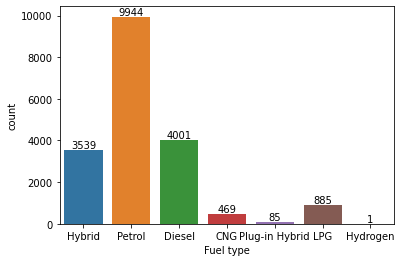

In [40]:
ax = sns.countplot(x='Fuel type',data=dataset)
ax.bar_label(ax.containers[0])

### 7685 cars have petrol engine followed by diesel engine with 3378 and 3320 cars which have hybrid engine. Only 1 car runs on Hydrogen as fuel

In [41]:
dataset['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 18924, dtype: object

In [42]:
dataset['Engine volume'].unique() 
#We have turbo and non turbo engine volume types. So we split the types into a new column called Engine volume type

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [43]:
dataset['Engine volume Type']=dataset['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo','2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo','1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo','4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo','2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo','0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo','1.1 Turbo'],'Turbo')

In [44]:
dataset['Engine volume Type']=dataset['Engine volume Type'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5','4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1','0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5','0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')

In [45]:
dataset['Engine volume Type'].unique()

array(['Non-Turbo', 'Turbo'], dtype=object)

[Text(0, 0, '17031'), Text(0, 0, '1893')]

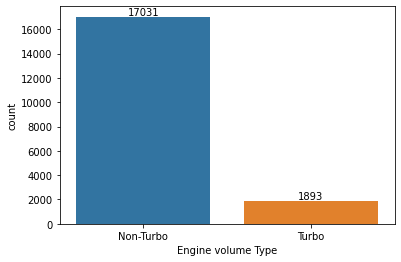

In [46]:
ax = sns.countplot(x='Engine volume Type',data=dataset)
ax.bar_label(ax.containers[0])

## Observation: 
#### We have 13761 Non Turbo Engine and 1474 Turbo Engines

In [47]:
dataset['Engine volume']=dataset['Engine volume'].str.replace('Turbo','')

In [48]:
dataset['Engine volume']=dataset['Engine volume'].astype(float)

In [49]:
dataset['Engine volume'].describe()

count    18924.000000
mean         2.306251
std          0.877591
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine volume, dtype: float64

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

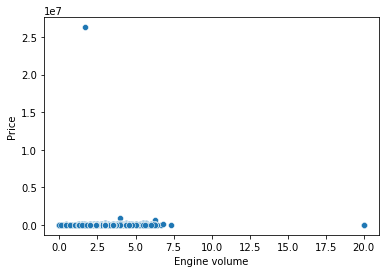

In [50]:
sns.scatterplot(data = dataset,x='Engine volume',y='Price')

## Observations: 
Maximum number of vehicles have engine volume between 0 and 7.5.
Price and engine volume have low correlation because some cars has higher price with same enginge volume

In [51]:
dataset['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [52]:
dataset['Mileage']=dataset['Mileage'].str.replace('km',' ') #Remove the km in the mileage

In [53]:
dataset['Mileage']=dataset['Mileage'].astype(int) #converting into int

In [54]:
dataset['Mileage'].describe()

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage, dtype: float64

In [55]:
dataset['Cylinders']

0        6.0
1        6.0
2        4.0
3        4.0
4        4.0
        ... 
19232    4.0
19233    4.0
19234    4.0
19235    4.0
19236    4.0
Name: Cylinders, Length: 18924, dtype: float64

In [56]:
dataset['Cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

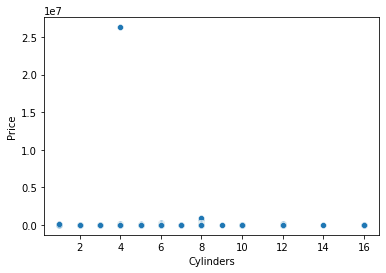

In [57]:
sns.scatterplot(data = dataset,x='Cylinders',y='Price')

In [58]:
dataset=dataset.drop('Cylinders',axis=1)

In [59]:
dataset['Gear box type']

0        Automatic
1        Tiptronic
2         Variator
3        Automatic
4        Automatic
           ...    
19232       Manual
19233    Tiptronic
19234    Automatic
19235    Automatic
19236    Automatic
Name: Gear box type, Length: 18924, dtype: object

In [60]:
dataset['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

[Text(0, 0, '13282'),
 Text(0, 0, '3065'),
 Text(0, 0, '733'),
 Text(0, 0, '1844')]

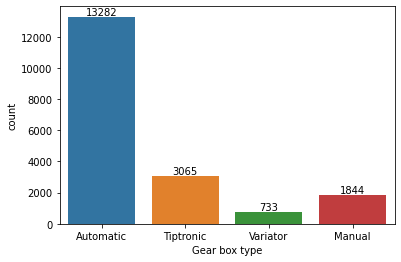

In [61]:
ax = sns.countplot(x='Gear box type',data=dataset)
ax.bar_label(ax.containers[0])

### Majority cars have automatic gear(11060) followed by Tiptronic(2421) and Manual(1047)

In [62]:
dataset['Drive wheels']

0          4x4
1          4x4
2        Front
3          4x4
4        Front
         ...  
19232     Rear
19233    Front
19234    Front
19235    Front
19236    Front
Name: Drive wheels, Length: 18924, dtype: object

In [63]:
dataset['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

[Text(0, 0, '3969'), Text(0, 0, '12695'), Text(0, 0, '2260')]

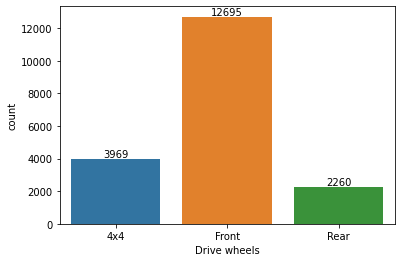

In [64]:
ax = sns.countplot(x='Drive wheels',data=dataset)
ax.bar_label(ax.containers[0])

### 11186 cars are front wheel driven cars. 2647 Cars have 4x4 accleration and 1402 cars have rear wheel acclearation

In [65]:
dataset['Doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
19236    04-May
Name: Doors, Length: 18924, dtype: object

In [66]:
dataset['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [67]:
dataset['Doors']=dataset['Doors'].replace({'04-May':4,'02-Mar':2})

In [68]:
dataset['Doors']=dataset['Doors'].astype(str)

In [69]:
dataset['Doors'].unique()

array(['4', '2', '>5'], dtype=object)

[Text(0, 0, '18032'), Text(0, 0, '768'), Text(0, 0, '124')]

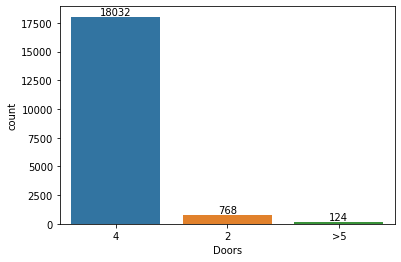

In [70]:
ax = sns.countplot(x='Doors',data=dataset)
ax.bar_label(ax.containers[0])

### 14682 cars have 4 doors. 
### Only 463 cars are 2 doored and only 90 cars have 5+ doors

In [71]:
dataset['Wheel']

0              Left wheel
1              Left wheel
2        Right-hand drive
3              Left wheel
4              Left wheel
               ...       
19232          Left wheel
19233          Left wheel
19234          Left wheel
19235          Left wheel
19236          Left wheel
Name: Wheel, Length: 18924, dtype: object

In [72]:
dataset['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

[Text(0, 0, '17471'), Text(0, 0, '1453')]

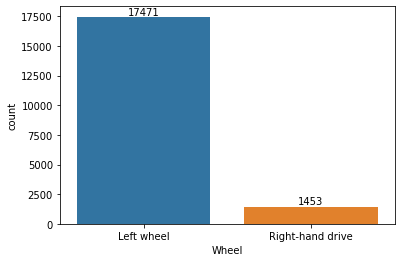

In [73]:
ax = sns.countplot(x='Wheel',data=dataset)
ax.bar_label(ax.containers[0])

### Left hand driven cars are more than right hand driven cars

In [74]:
dataset['Color']

0        Silver
1         Black
2         Black
3         White
4        Silver
          ...  
19232    Silver
19233       Red
19234      Grey
19235     Black
19236     White
Name: Color, Length: 18924, dtype: object

In [75]:
dataset['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

[Text(0, 0, '3729'),
 Text(0, 0, '4944'),
 Text(0, 0, '4407'),
 Text(0, 0, '2343'),
 Text(0, 0, '1376'),
 Text(0, 0, '321'),
 Text(0, 0, '622'),
 Text(0, 0, '122'),
 Text(0, 0, '252'),
 Text(0, 0, '105'),
 Text(0, 0, '185'),
 Text(0, 0, '143'),
 Text(0, 0, '134'),
 Text(0, 0, '177'),
 Text(0, 0, '39'),
 Text(0, 0, '25')]

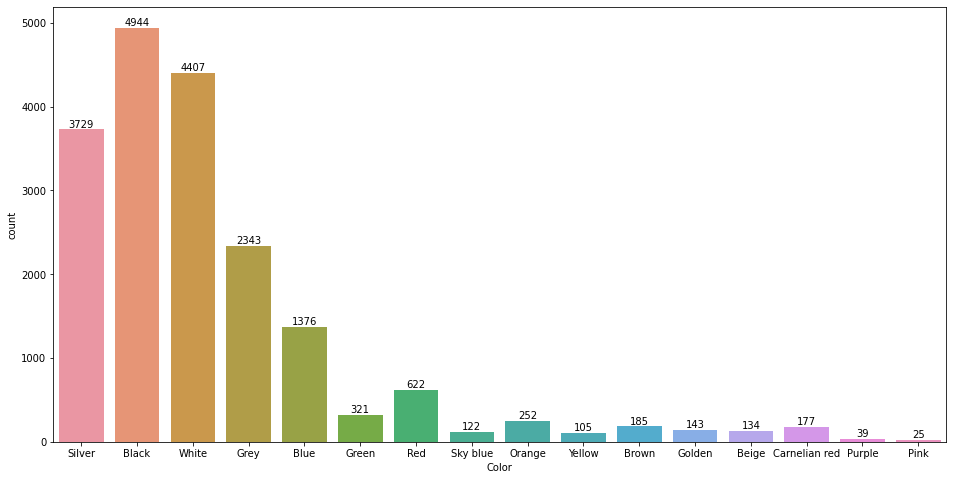

In [76]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='Color',data=dataset)
ax.bar_label(ax.containers[0])

### Black Colour Cars are the most (3817) followed by White cars(3652). Pink cars are least in number(22)

In [77]:
dataset['Airbags']

0        12
1         8
2         2
3         0
4         4
         ..
19232     5
19233     8
19234     4
19235     4
19236    12
Name: Airbags, Length: 18924, dtype: int64

In [78]:
dataset['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

# Exploratory Data Analysis

## Outlier Removal using IQR method

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               18924 non-null  int64  
 1   Levy                18924 non-null  int64  
 2   Prod. year          18924 non-null  int64  
 3   Category            18924 non-null  object 
 4   Leather interior    18924 non-null  object 
 5   Fuel type           18924 non-null  object 
 6   Engine volume       18924 non-null  float64
 7   Mileage             18924 non-null  int64  
 8   Gear box type       18924 non-null  object 
 9   Drive wheels        18924 non-null  object 
 10  Doors               18924 non-null  object 
 11  Wheel               18924 non-null  object 
 12  Color               18924 non-null  object 
 13  Airbags             18924 non-null  int64  
 14  Car model           18924 non-null  object 
 15  Engine volume Type  18924 non-null  object 
dtypes: f

<AxesSubplot:xlabel='Levy'>

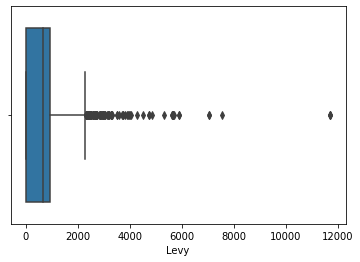

In [80]:
sns.boxplot(x ='Levy', data=dataset)

<AxesSubplot:xlabel='Prod. year'>

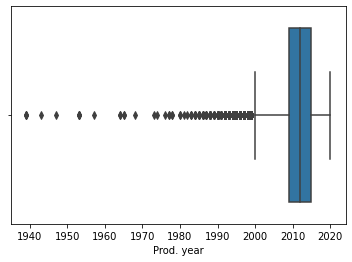

In [81]:
sns.boxplot(x ='Prod. year', data=dataset)

<AxesSubplot:xlabel='Engine volume'>

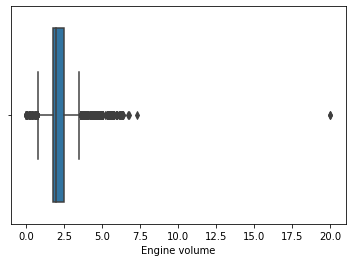

In [82]:
sns.boxplot(x ='Engine volume', data=dataset)

In [83]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [84]:
dataset = dataset[~((dataset < (Q1-1.5*IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='Levy'>

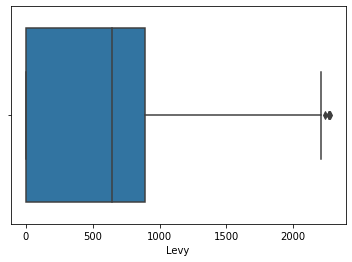

In [85]:
sns.boxplot(x ='Levy', data=dataset)

<AxesSubplot:xlabel='Prod. year'>

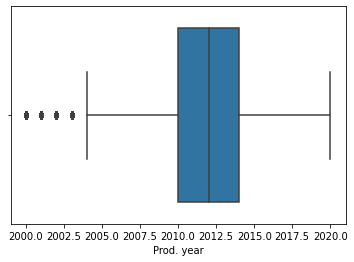

In [86]:
sns.boxplot(x ='Prod. year', data=dataset)

<AxesSubplot:xlabel='Engine volume'>

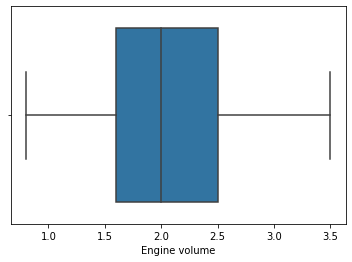

In [87]:
sns.boxplot(x ='Engine volume', data=dataset)

## Observations:
#### Outlier removal via IQR method

##### The remaining points after the removal cannot be treated as outliers as those values are near to the range

## Correlation of independent with dependent variable

<AxesSubplot:>

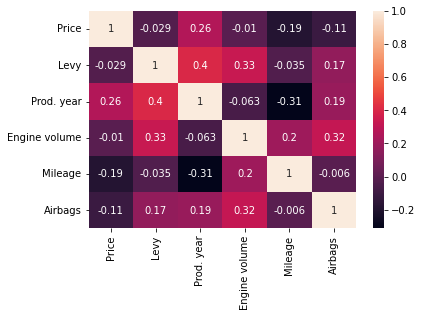

In [88]:
sns.heatmap(dataset.corr(),annot=True)

## Observations: 

#### Price has slightly high correaltion with Production year and negative correlation with Levy
#### No two independent variables have same value hence ruling out multicolinearity

### Encoding categorical variable using LabelEncoder

In [89]:
def preprocessor(dataset):
    res_df = dataset.copy()
    le = preprocessing.LabelEncoder()
    
    
    res_df['Car model'] = le.fit_transform(res_df['Car model'])
    res_df['Category'] = le.fit_transform(res_df['Category'])
    res_df['Leather interior'] = le.fit_transform(res_df['Leather interior'])
    res_df['Fuel type'] = le.fit_transform(res_df['Fuel type'])
    res_df['Gear box type'] = le.fit_transform(res_df['Gear box type'])
    res_df['Drive wheels'] = le.fit_transform(res_df['Drive wheels'])
    res_df['Doors'] = le.fit_transform(res_df['Doors'])
    res_df['Wheel'] = le.fit_transform(res_df['Wheel'])
    res_df['Color'] = le.fit_transform(res_df['Color'])
    res_df['Engine volume Type'] = le.fit_transform(res_df['Engine volume Type'])
    return res_df

In [90]:
encoded_df = preprocessor(dataset)
encoded_df

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car model,Engine volume Type
0,13328,1399,2010,4,1,2,3.5,186005,0,0,1,0,12,12,542,0
1,16621,1018,2011,4,0,5,3.0,192000,2,0,1,0,1,8,169,0
2,8467,0,2006,3,0,5,1.3,200000,3,1,1,1,1,2,337,0
3,3607,862,2011,4,1,2,2.5,168966,0,0,1,0,14,0,252,0
4,11726,446,2014,3,1,5,1.3,91901,0,1,1,0,12,4,337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055,2013,9,1,1,3.5,107800,0,2,1,0,7,12,678,0
19233,15681,831,2011,9,1,5,2.4,161600,2,1,1,0,11,8,417,0
19234,26108,836,2010,4,1,1,2.0,116365,0,1,1,0,7,4,435,0
19235,5331,1288,2007,4,1,1,2.0,51258,0,1,1,0,1,4,153,0


In [91]:
x = encoded_df.iloc[:,1:18]
y = encoded_df['Price']  #Splitting dependent and independent variable

### Standardization of independent variables

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [93]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.752001,-0.382085,-0.836853,0.615818,-0.758448,2.256620,0.708736,-0.571754,-1.804050,0.129581,-0.306076,0.753566,1.232779,-0.195072,-0.327283
1,0.909224,-0.142801,-0.836853,-1.623855,0.916992,1.427389,0.784958,1.603194,-1.804050,0.129581,-0.306076,-1.300639,0.288243,-1.304646,-0.327283
2,-1.342608,-1.339220,-1.195034,-1.623855,0.916992,-1.391999,0.886673,2.690668,0.160546,0.129581,3.267159,-1.300639,-1.128561,-0.804892,-0.327283
3,0.564149,-0.142801,-0.836853,0.615818,-0.758448,0.598157,0.492096,-0.571754,-1.804050,0.129581,-0.306076,1.127058,-1.600829,-1.057744,-0.327283
4,-0.356049,0.575051,-1.195034,0.615818,0.916992,-1.391999,-0.487734,-0.571754,0.160546,0.129581,-0.306076,0.753566,-0.656293,-0.804892,-0.327283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,0.991068,0.335767,0.954052,0.615818,-1.316928,2.256620,-0.285589,-0.571754,2.125143,0.129581,-0.306076,-0.180164,1.232779,0.209491,-0.327283
15231,0.495577,-0.142801,0.954052,0.615818,0.916992,0.432311,0.398442,1.603194,0.160546,0.129581,-0.306076,0.566820,0.288243,-0.566913,-0.327283
15232,0.506637,-0.382085,-0.836853,0.615818,-1.316928,-0.231074,-0.176690,-0.571754,0.160546,0.129581,-0.306076,-0.180164,-0.656293,-0.513368,-0.327283
15233,1.506468,-1.099936,-0.836853,0.615818,-1.316928,-0.231074,-1.004482,-0.571754,0.160546,0.129581,-0.306076,-1.300639,-0.656293,-1.352242,-0.327283


### Multicollinearity check through Variance Inflation Factor

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled

vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [ variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.529791,Levy
1,1.737441,Prod. year
2,1.208829,Category
3,1.453632,Leather interior
4,1.181265,Fuel type
5,1.608468,Engine volume
6,1.196599,Mileage
7,1.289001,Gear box type
8,1.164489,Drive wheels
9,1.116420,Doors


#### Observations: There is no multicollinearity among independent variables as VIF values are not greater than 5.

### Splitting the data into training and testing 

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12188, 15)
(3047, 15)
(12188,)
(3047,)


In [96]:
x_train.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car model,Engine volume Type
15569,0,2003,3,1,5,1.6,0,1,1,0,1,12,2,900,0
12172,638,2014,9,1,5,2.0,45504,0,1,1,0,1,4,482,0
6102,1185,2009,4,1,2,2.5,196682,0,1,1,0,1,0,252,0
12688,0,2006,9,0,5,2.0,225000,0,0,1,0,7,6,13,0
7552,1091,2016,9,1,5,2.5,70344,0,1,1,0,14,12,277,0


In [97]:
x_test.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car model,Engine volume Type
11855,473,2014,9,1,5,1.4,83000,0,1,1,0,14,6,155,0
5293,0,2010,9,0,2,1.8,208000,3,1,1,0,5,6,1069,0
9511,0,2014,7,0,1,2.2,140000,2,2,1,0,14,6,744,1
15427,382,2017,3,1,2,1.5,26724,2,1,1,0,2,12,1077,0
18304,475,2012,3,1,5,1.4,92800,2,1,0,0,11,7,225,0


In [98]:
y_train.head()

15569     2998
12172    14113
6102       188
12688    11000
7552      1725
Name: Price, dtype: int64

In [99]:
y_test.head()

11855    10976
5293     14583
9511     43278
15427    14426
18304    11917
Name: Price, dtype: int64

### Creating Linear Regression Model with training dataset

In [100]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Printing the intercept and slope value. 

#### Linear Regression Equation Y = mx+c. Here m is the intercept and c is the slope. X values are the values of independent variables. So the equation becomes Y =mx1+mx2+mx3+...+mxn + c 

In [101]:
print(lm.intercept_) 

-2102866.786537205


In [102]:
print(lm.coef_) 

[-3.55503418e+00  1.05422439e+03 -3.70590796e+02 -2.35259534e+02
 -7.53077756e+02  2.95892460e+03 -1.85448243e-02  2.36021668e+03
  1.19198841e+03  1.91171513e+03 -3.82180849e+03  3.75290524e+01
 -6.06231240e+02 -5.97827765e-01  5.56629925e+03]


In [103]:
coef_df = pd.DataFrame(lm.coef_,x.columns,columns =['Coefficient'])
coef_df

,Coefficient
Levy,-3.555034
Prod. year,1054.224395
Category,-370.590796
Leather interior,-235.259534
Fuel type,-753.077756
Engine volume,2958.924600
Mileage,-0.018545
Gear box type,2360.216684
Drive wheels,1191.988412
Doors,1911.715131


### Predict the model with test dataset

In [104]:
y_pred = lm.predict(x_test)
y_pred

array([13825.98115614, 18847.04834545, 31932.94964223, ...,
       19181.86237163,  4935.71104396, 14516.30222427])

### Evalution by OLS Method

In [105]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [106]:
reg_model = smf.OLS(endog = y_train,exog=x_train).fit()

In [107]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              1752.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                        0.00
Time:                        19:12:56   Log-Likelihood:                     -1.3010e+05
No. Observations:               12188   AIC:                                  2.602e+05
Df Residuals:                   12173   BIC:                                  2.603e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Levy                  -0.5182      0.244     -2.125      0.034      -0.996      -0.040
Prod. year             9.5323      0.405     23.553      0.000       8.739      10.326
Category            -287.2180     37.317     -7.697      0.000    -360.366    -214.070
Leather interior    1302.7437    251.477      5.180      0.000     809.808    1795.679
Fuel type           -701.3074     57.448    -12.208      0.000    -813.914    -588.701
Engine volume        877.1936    189.305      4.634      0.000     506.125    1248.262
Mileage               -0.0321      0.001    -25.509      0.000      -0.035      -0.030
Gear box type       2121.1020    117.374     18.071      0.000    1891.030    2351.174
Drive wheels         687.1555    200.945      3.420      0.001     293.271    1081.040
Doors               3073.4754    525.122      5.853      0.000    2044.154    4102.797
Wheel              -7500.0896    375.358    -19.981      0.000   -8235.852   -6764.328
Color                 38.2998     17.966      2.132      0.033       3.084      73.516
Airbags             -439.2754     25.393    -17.299      0.000    -489.050    -389.501
Car model             -0.7494      0.302     -2.486      0.013      -1.340      -0.158
Engine volume Type  4651.7362    341.387     13.626      0.000    3982.563    5320.910
==============================================================================
Omnibus:                      539.444   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.560
Skew:                           0.549   Prob(JB):                    5.85e-134
Kurtosis:                       3.054   Cond. No.                     8.49e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations: 
##### The R2 and Adj R2 values are almost same. which is 68% accuracy. 
#### If we observe the p-value in the table all variables have values less than 0.05. So there is no need to drop 

<AxesSubplot:xlabel='Price', ylabel='Density'>

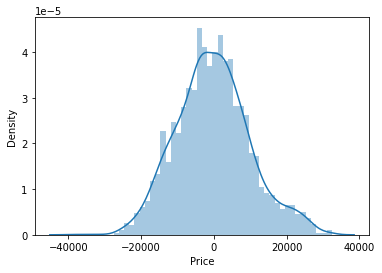

In [108]:
sns.distplot((y_test - y_pred),bins=50)

### We can observe a normal distribution in the prediction

##### Model evaluation using Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

In [109]:
from sklearn import metrics

In [110]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

RMSE: 10201.711649763361
MSE: 104074920.58491747
MAE: 8036.825081320541


### Building Model using DecisionTreeRegressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [112]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

In [113]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)*100

99.59272379528156

In [114]:
r2_score(y_test,y_pred_test)*100

55.349561619117104

### Observations:
##### We can observe that we get 99% Training accuracy  and 54% Testing accuracy while using the DTRegressor

### Building Model using RandomForestRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [116]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [117]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_rf_train)*100

96.65485459728593

In [118]:
r2_score(y_test,y_pred_rf_test)*100

75.1312939022138

### Observations:
##### We can observe that we get 96% Training accuracy  and 75% Testing accuracy while using the RFRegressor

### We can conclude that we get the best accuracy when we use RandomForest Regressor as compared to other models such as Linear Regression and DecisionTree Regressor 